# Pràctica 1:

Nom dels alumnes del grup: Andres Rio i Aleix Falgosa

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.

In [ ]:
from platform import python_version
print(python_version())

3.11.7


In [ ]:
! pip install pyarrow

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [ ]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [ ]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, hem de considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [ ]:
# Carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# eliminem les columnes que no són útils i treballem amb una mostra
# uniforme de les dades (1 fila de cada 100).

def load_table(year, month, sampling = 100):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(76967, 9)

In [ ]:
test.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7695700,2019-01-30 22:40:39,2019-01-30 22:41:55,NaN,0.17,256,256,0,39.95,43.0
7695800,2019-01-31 06:58:00,2019-01-31 07:44:00,NaN,17.57,108,56,0,77.45,81.0
7695900,2019-01-31 07:46:00,2019-01-31 08:37:00,NaN,10.85,91,231,0,37.19,46.5
7696000,2019-01-31 09:00:00,2019-01-31 09:45:00,NaN,4.11,162,231,0,35.95,39.5
7696100,2019-01-31 11:18:35,2019-01-31 11:41:41,NaN,4.52,244,75,0,29.45,32.5
7696200,2019-01-31 14:01:00,2019-01-31 15:08:00,NaN,16.32,36,21,0,59.15,62.7
7696300,2019-01-31 15:35:00,2019-01-31 15:55:00,NaN,4.96,18,220,0,26.31,32.5
7696400,2019-01-31 17:11:00,2019-01-31 18:05:00,NaN,14.78,107,130,0,50.69,60.0
7696500,2019-01-31 18:33:00,2019-01-31 18:58:00,NaN,8.80,107,69,0,39.45,43.0
7696600,2019-01-31 23:31:07,2019-01-31 23:51:40,NaN,9.17,140,47,0,43.45,46.5


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, **explora** els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [ ]:
def clean_data(data, year, month):
    """
    Funció que neteja (una mostra de) les dades per un mes donat.
    """

    #VALORES REPETIDOS / NAN
    data = data.drop_duplicates()  # eliminar elementos duplicados
    data = data.dropna()   # eliminar todas las filas con alguna columna nan



    #NUMERO DE PASAGEROS   ( https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page indica que el maximo es 5 ??? )
    mask = (data['passenger_count'] > 0) & (data['passenger_count'] <= 6)  # TRUE PARA LOS VALORES QUE ESTEN EN EL RANGO [1,6]
    data = data[mask]  #MANTENER LOS VALORES DONDE LA MASCARA DA TRUE

    #INDICES DE PAGO
    mask = (data['payment_type'] > 0) & (data['payment_type'] <= 6)  # TRUE PARA LOS VALORES QUE ESTEN EN EL RANGO [1,6]
    data = data[ mask ]

    #VALOR DEL DINERO 
    # 1. que fare amount sea menor a total amount 
    mask = data['fare_amount'] < data['total_amount']  # un cliente no va a pagar menos de lo que debe
    data = data [ mask ]

    # 2. que el minimo tenga sentido 
    # https://www.nuevayork.net/taxi
    # https://www.nuevayork.es/practico/transportes/taxis-nueva-york/
    
    data = data [ data ['fare_amount'] > 5 ]   # Las tasas de los taxis ya aumentan su precio base hasta 4-4.5 $
    data = data [ data ['total_amount'] > 5 ]
    
    # 3. que el maximo tenga sentido
    data = data [ data ['total_amount'] < 420 ]  
    data = data [ data ['fare_amount'] < 320 ]  
    # suponiendo el peor caso de coger tarde el taxi en dia festivo a hora punta con trafico direccion al aeropuerto con peajes y dando 
    # una propina considerable no deberia de superar los 200$ siendo este un caso muy extremo 
    
    # también controlar que el fare amount no pase un valor ( sin propina un viaje no deberia superar los 140 
    #( 140 sale de restarle un 30% de propina a 200 )
    
    # 30% es el valor maximo que ofrecen los taxis, siendo un valor muy poco comun entre los neoyorkinos

    # DISTANCIA
    # La distancia mínima de un viaje en taxi ponemos que sea de al menos 200 metros (aproximadamente 0.12 millas). Menos que eso no tiene mucho sentido.
    # La distancia máxima se establece en 45 millas, que es más que suficiente para cualquier viaje en Nueva York.

    mask =  (  data['trip_distance'] >= 0.13 ) &  (  data['trip_distance'] < 45 )
    data = data[ mask ]
    

    
    #IDs 
    # que los ids esten dentro de los valores existentes
    # https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/taxi-zone-lookup.csv  ( del 1 al 265 )

    #IDs de pick up
    mask = (data['PULocationID'] > 0) & (data['PULocationID'] <= 265 )  # que los valores vayan de [1,265]
    data = data [ mask ]

    #IDs de drop out
    mask = (data['DOLocationID'] > 0) & (data['DOLocationID'] <= 265 )  # que los valores vayan de [1,265]
    data = data [ mask ]
    
    #FECHAS
    # Crear la máscara para que de true el valor del año y del mes correspondiente
    mask = (data['tpep_pickup_datetime'].dt.year == year) & (data['tpep_pickup_datetime'].dt.month == month)
    data = data[mask]      # coger solo los valores en true ( eliminar aquellos que no cumplen la condicion ) 

    # Crear la máscara para que de true el valor del año y del mes correspondiente
    mask = (data['tpep_dropoff_datetime'].dt.year == year) & (data['tpep_dropoff_datetime'].dt.month == month)
    data = data[mask]      # coger solo los valores en true ( eliminar aquellos que no cumplen la condicion ) 

     # Asegurarse que la fecha de entrada es menor a la de salida
    mask = data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime'] 
    data = data[mask]




    # MANTENER EL TIPO CORRECTO DE LAS VARIABLES

    # Asegurar que las columnas de fechas sean del tipo datetime
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    
    # Asegurar que 'passenger_count' esté en el tipo correcto (int)
    data['passenger_count'] = data['passenger_count'].astype(np.int64)
    
    # Asegurar que las columnas de cantidad estén en tipo float
    data['trip_distance'] = data['trip_distance'].astype(float)
    data['fare_amount'] = data['fare_amount'].astype(float)
    data['total_amount'] = data['total_amount'].astype(float)
    
    # Asegurar que las columnas de ID y payment_type estén en tipo int
    data['PULocationID'] = data['PULocationID'].astype(np.int64)
    data['DOLocationID'] = data['DOLocationID'].astype(np.int64)
    data['payment_type'] = data['payment_type'].astype(np.int64)

    return data


test = clean_data(test, 2019,1)
test.shape

(34121, 42)

In [ ]:
test.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7667300,2019-01-31 23:52:01,2019-01-31 23:57:25,1,1.20,142,239,1,6.5,9.36
7667400,2019-01-31 15:31:51,2019-01-31 15:43:41,3,1.62,186,161,1,9.5,13.50
7667600,2019-01-31 23:13:39,2019-01-31 23:19:36,1,2.19,142,151,1,8.0,11.16
7667700,2019-01-31 18:44:20,2019-01-31 18:50:12,1,0.59,161,162,2,5.5,6.80
7667900,2019-01-31 23:32:17,2019-01-31 23:47:35,2,2.52,164,113,1,11.5,14.00


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem transformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

> Un cop tenim les dades normalitzades i enriquides hem de pensar en la neteja una altra vegada. Per exemple: Eliminar aquelles files que tinguin velocitat max excedeixi limit permès per llei https://www.speed-limits.com/newyork

In [ ]:
def post_processing(data):
    """
    Funció on implementar qualsevol tipus de postprocessament necessari.
    """
    def payment_type_alphabetic(payment_type):
        """
        Devuelve un String con el tipo de pago
        
        :param payment_type : número con el formato 1-6
        :return: String con el tipo de pago
        """
        if payment_type == 1:
            return 'Credit card'
        elif payment_type == 2:
            return 'Cash'
        elif payment_type == 3:
            return 'No charge'
        elif payment_type == 4:
            return 'Dispute'
        elif payment_type == 5:
            return 'Unknown'
        elif payment_type == 6:
            return 'Voided trip'
        else:
            return 'Invalid'


    def epoca_del_año( mes ):
        """
        Devuelve un String con la epoca del año
        
        :param mes: Mes con el formato 1-12
        :return: String con el momento del dia 
        """
        if mes >= 1 or mes <= 3:
            return 'Winter'
        if mes >= 4 or mes <= 6:
            return 'Spring'
        if mes >= 7 or mes <= 9:
            return 'Summer'
        if mes >= 10 or mes <= 12:
            return 'Autumn'

        return np.Nan


    def epoca_del_año_ID( mes ):
        """
        Devuelve un ID con la epoca del año
        
        :param mes: Mes con el formato 1-12
        :return: ID con el momento del dia 
            - 1 : invierno 
            - 2 : primavera 
            - 3 : verano 
            - 4 : otoño )
        """
        if mes >= 1 or mes <= 3:   # Winter
            return 1
        if mes >= 4 or mes <= 6:   # Spring
            return 2
        if mes >= 7 or mes <= 9:   # Summer
            return 3
        if mes >= 10 or mes <= 12: # Autumn
            return 4

        return np.nan  # valor fuera de 1-12

    def daytime(hour):
        """
        Devuelve un string con la hora del dia
        
        :param hour: Hora con el formato 0-23
        :return: string con la hora del dia.
        """
        if hour >= 0 and hour < 6:
            return 'Early Morning'
        elif hour >= 6 and hour < 7:
            return 'Dawn'
        elif hour >= 7 and hour < 9:
            return 'Morning Rush Hour'
        elif hour >= 9 and hour < 12:
            return 'Morning'
        elif hour >= 12 and hour < 13:
            return 'Lunch Hour'
        elif hour >= 13 and hour < 16:
            return 'Afternoon'
        elif hour >= 16 and hour < 18:
            return 'Afternoon Rush Hour'
        elif hour >= 18 and hour < 24:
            return 'Evening'
        else:
            return np.nan  # hora fuera del 0-23


        
    def daytime_ID(hour):
        """
        Devuelve un ID con la hora del dia
        
        :param hour: Hora con el formato 0-23
        :return: ID con la hora del dia
            - 1 : madrugada 
            - 2 : amanecer 
            - 3 : hora punta de la mañana
            - 4 : mañana
            - 5 : hora de comer
            - 6 : tarde
            - 7 : hora punta de la tarde
            - 8 : noche 
        """
        if hour >= 0 and hour < 6:
            return 1  # Early Morning
        elif hour >= 6 and hour < 7:
            return 2  # Dawn
        elif hour >= 7 and hour < 9:
            return 3  # Morning Rush Hour
        elif hour >= 9 and hour < 12:
            return 4  # Morning
        elif hour >= 12 and hour < 13:
            return 5  # Lunch Hour
        elif hour >= 13 and hour < 16:
            return 6  # Afternoon
        elif hour >= 16 and hour < 18:
            return 7  # Afternoon Rush Hour
        elif hour >= 18 and hour < 24:
            return 8  # Evening
        else:
            return np.nan  # Hour out of the range 0-23
        
    tasa_cambio_dolar_euro = 0.91   # 1 dolar usd  = 0.91 €    
    relacion_milla_km = 1.60934   # 1 milla = 1.60934 kilómetros

    #CREACION DE COLUMNAS NUEVAS

    data['trip_distance_Km']=data['trip_distance']*relacion_milla_km        # cambiar a km ( SI )
    data['payment_type_alphabetic'] = data['payment_type'].apply(payment_type_alphabetic)  # lo ponemos en string para hacer la tabla mas leible
    data['fare_amount_€'] = data['fare_amount']*tasa_cambio_dolar_euro      # cambiar el pago a €
    data['total_amount_€'] = data['total_amount']*tasa_cambio_dolar_euro    # cambiar el pago a €
    data['tips'] = data['total_amount']-data['fare_amount']                 # calcular el pago 'extra' de los clientes
    data['tips_€'] = data['tips']*tasa_cambio_dolar_euro                    # cambiar el pago a €
    data['year']= data['tpep_dropoff_datetime'].dt.year                     # coger el año donde acaba el viaje
    data['month']= data['tpep_dropoff_datetime'].dt.month                   # coger el mes donde acaba el viaje
    data['day']= data['tpep_dropoff_datetime'].dt.day                       # coger el dia donde acaba el viaje
    data['pickup_week']= data['tpep_pickup_datetime'].dt.isocalendar().week    # coger la semana donde empieza el viaje
    data['dropoff_week']= data['tpep_dropoff_datetime'].dt.isocalendar().week  # coger la semana donde acaba el viaje
    data['pickup_day']= data['tpep_pickup_datetime'].dt.dayofweek +1    # coger el dia de la semana donde empieza el viaje ( +1 para tener de 1-7 en vez de 0-6 )
    data['dropoff_day']= data['tpep_dropoff_datetime'].dt.dayofweek +1  # coger el dia de la semana donde acaba el viaje ( +1 para tener de 1-7 en vez de 0-6 )
    data['pickup_hour']= data['tpep_pickup_datetime'].dt.hour        # coger la hora de inicio
    data['dropoff_hour']= data['tpep_dropoff_datetime'].dt.hour      # coger la hora de final
    data['trip_duration']= data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']        # duración del viaje
    data['trip_duration_sec']= data['trip_duration'].dt.total_seconds()        # duración en segundos
    data['trip_duration_min']= data['trip_duration_sec']/60                 # duración en minutos
    data['trip_duration_h']= data['trip_duration_min']/60                 # duración en horas
    data['speed']= data['trip_distance']/data['trip_duration_h']           # velocidad
    data['speed_Km/h']= data['trip_distance_Km']/data['trip_duration_h']       # velocidad en km/h ( SI )
    data['season_of_the_year'] = data['month'].apply( epoca_del_año )           # temporada del año
    data['season_of_the_year_ID'] = data['month'].apply( epoca_del_año_ID )       # temporada del año con valores numericos
    data['daytime'] = data['tpep_pickup_datetime'].dt.hour.apply( daytime )      # momento del dia
    data['daytime_ID'] = data['tpep_pickup_datetime'].dt.hour.apply( daytime_ID )  # momento del dia con valores numericos

    #PROPINAS
    data['tip_percent'] = round((data['tips'] / data['fare_amount']) * 100, 2)
    # no limpiamos la columna de tip_percent porque aunque nos den valores superiores al 30% (limite normal de propina del taxi) podria ser que el taxi
    # pida más dinero al cliente para aprovecharse o por la situación del viaje que han tenido.
    #     data = data[  data['tips'] <= data['fare_amount'] * 0.30]  # Limitar la propina al 30% del fare_amount


    # con lo que paso en febrero de 2019 los taxis empezaron a subir esta 'propina' a valores mucho superiores al 30% para poder 
    # cobrar lo suficiente para vivir. Si filtramos esta columna como exclusivamente 'propinas' nos quedamos con 800k filas menos
    # y se veria como en enero de 2019 hubo un peak de viajes ( cuando no cobraban de más a los clientes ) .

    #https://www.infobae.com/america/2019/10/12/suicidios-deudas-impagables-y-la-extincion-de-un-icono-urbano-como-afecta-a-nueva-york-la-gran-crisis-de-sus-taxis/
    #https://eldiariony.com/2019/02/01/taxistas-aseguran-que-nuevo-impuesto-al-servicio-los-ahorcara-mas/
 
    
    


    #LIMPIEZA DE LOS DATOS NUEVOS

    #DURACION DEL VIAJE
    data = data [  data['trip_duration'] >= pd.Timedelta(minutes=4)]  
    # entre coger el taxi y pagar ya son 1-2 minutos + el desplazamiento, no tiene sentido un viaje tan corto
    data = data [ data['trip_duration'] < pd.Timedelta(hours=3)]
    # se puede recorrer todo nueva york en menos de 1 hora, aun con tráfico denso no deberia superar las 3 horas


    #VELOCIDAD
    data = data [ data ['speed'] < 65 ] # el limite de velocidad esta en 65, cualquier valor superior es delito o una anomalia
    data = data [ data ['speed'] >= 2 ]
    # por mucho trafico que haya, ir a menos de 2 millas por hora es que apenas se ha movido el taxi



    # PONER LA FECHA EN NUEVOS FORMATOS


    # SOLO DIA DEL AÑO  ( sin la hora )
    data['tpep_pickup_datetime_YYYY_MM_DD'] = data['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
    data['tpep_dropoff_datetime_YYYY_MM_DD'] = data['tpep_dropoff_datetime'].dt.strftime('%Y-%m-%d')
    
    # Formato DD-MM-YYYY   
    data['tpep_pickup_datetime_DD_MM_YYYY'] = data['tpep_pickup_datetime'].dt.strftime('%d-%m-%Y')
    data['tpep_dropoff_datetime_DD_MM_YYYY'] = data['tpep_dropoff_datetime'].dt.strftime('%d-%m-%Y')
    
    # Formato DD-MM-YY (año en dos dígitos)
    data['tpep_pickup_datetime_DD_MM_YY'] = data['tpep_pickup_datetime'].dt.strftime('%d-%m-%y')
    data['tpep_dropoff_datetime_DD_MM_YY'] = data['tpep_dropoff_datetime'].dt.strftime('%d-%m-%y')
    
    # SOLO LA HORA (HH:MM:SS)
    data['tpep_pickup_datetime_H_M_S'] = data['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')
    data['tpep_dropoff_datetime_H_M_S'] = data['tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')





    # ASEGURAR QUE EL TIPO DE DATO SEA EL CORRECTO

    # Convertir columnas de fecha a datetime
    data['tpep_pickup_datetime_YYYY_MM_DD'] = pd.to_datetime(data['tpep_pickup_datetime_YYYY_MM_DD'], errors='coerce')
    data['tpep_dropoff_datetime_YYYY_MM_DD'] = pd.to_datetime(data['tpep_dropoff_datetime_YYYY_MM_DD'], errors='coerce')
    data['tpep_pickup_datetime_DD_MM_YYYY'] = pd.to_datetime(data['tpep_pickup_datetime_DD_MM_YYYY'], dayfirst=True, errors='coerce')
    data['tpep_dropoff_datetime_DD_MM_YYYY'] = pd.to_datetime(data['tpep_dropoff_datetime_DD_MM_YYYY'], dayfirst=True, errors='coerce')
    data['tpep_pickup_datetime_DD_MM_YY'] = pd.to_datetime(data['tpep_pickup_datetime_DD_MM_YY'], format='%d-%m-%y', errors='coerce')
    data['tpep_dropoff_datetime_DD_MM_YY'] = pd.to_datetime(data['tpep_dropoff_datetime_DD_MM_YY'], format='%d-%m-%y', errors='coerce')

    # Convertir las columnas de hora a timedelta ( datetime64 no es posible porque necesita una fecha asociada ) 
    data['tpep_pickup_datetime_H_M_S'] = pd.to_timedelta(data['tpep_pickup_datetime_H_M_S'])
    data['tpep_dropoff_datetime_H_M_S'] = pd.to_timedelta(data['tpep_dropoff_datetime_H_M_S'])
    

    # Convertir las columnas a tipo 'category' o 'string' según sea apropiado
    data['daytime'] = data['daytime'].astype('string')
    data['season_of_the_year'] = data['season_of_the_year'].astype('string')
    data['payment_type_alphabetic'] = data['payment_type_alphabetic'].astype('string')
    

    required_data = [
                 'tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'tpep_pickup_datetime_YYYY_MM_DD',
                 'tpep_dropoff_datetime_YYYY_MM_DD',
                 'tpep_pickup_datetime_DD_MM_YYYY',
                 'tpep_dropoff_datetime_DD_MM_YYYY',
                 'tpep_pickup_datetime_DD_MM_YY',   
                 'tpep_dropoff_datetime_DD_MM_YY',
                 'tpep_pickup_datetime_H_M_S',
                 'tpep_dropoff_datetime_H_M_S',
                 'year',
                 'month',
                 'day',
                 'daytime',
                 'daytime_ID',
                 'season_of_the_year',
                 'season_of_the_year_ID',
                 'pickup_week',
                 'dropoff_week',
                 'pickup_day',
                 'dropoff_day',
                 'pickup_hour',
                 'dropoff_hour',
                 'trip_duration',
                 'trip_duration_sec',
                 'trip_duration_min',
                 'trip_duration_h',
                 'trip_distance',
                 'trip_distance_Km',
                 'speed',
                 'speed_Km/h',
                 'passenger_count',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'payment_type_alphabetic',
                 'fare_amount',
                 'fare_amount_€',
                 'total_amount',
                 'total_amount_€',
                 'tips',
                 'tips_€',
                 'tip_percent']

    return data[required_data]
    
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

test = post_processing(test)
test.shape

(34086, 43)

In [ ]:
test.tail() 

,tpep_pickup_datetime,tpep_dropoff_datetime,tpep_pickup_datetime_YYYY_MM_DD,tpep_dropoff_datetime_YYYY_MM_DD,tpep_pickup_datetime_DD_MM_YYYY,tpep_dropoff_datetime_DD_MM_YYYY,tpep_pickup_datetime_DD_MM_YY,tpep_dropoff_datetime_DD_MM_YY,tpep_pickup_datetime_H_M_S,tpep_dropoff_datetime_H_M_S,year,month,day,daytime,daytime_ID,season_of_the_year,season_of_the_year_ID,pickup_week,dropoff_week,pickup_day,dropoff_day,pickup_hour,dropoff_hour,trip_duration,trip_duration_sec,trip_duration_min,trip_duration_h,trip_distance,trip_distance_Km,speed,speed_Km/h,passenger_count,PULocationID,DOLocationID,payment_type,payment_type_alphabetic,fare_amount,fare_amount_€,total_amount,total_amount_€,tips,tips_€,tip_percent
7665900,2019-01-31 23:13:29,2019-01-31 23:28:50,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,0 days 23:13:29,0 days 23:28:50,2019,1,31,Evening,8,Winter,1,5,5,4,4,23,23,0 days 00:15:21,921.0,15.350000,0.255833,5.30,8.529502,20.716612,33.340073,1,79,74,1,Credit card,16.5,15.015,19.8,18.018,3.3,3.003,20.00
7666500,2019-01-31 23:03:05,2019-01-31 23:08:06,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,0 days 23:03:05,0 days 23:08:06,2019,1,31,Evening,8,Winter,1,5,5,4,4,23,23,0 days 00:05:01,301.0,5.016667,0.083611,1.00,1.609340,11.960133,19.247920,1,48,246,2,Cash,6.0,5.460,7.3,6.643,1.3,1.183,21.67
7667100,2019-01-31 23:23:36,2019-01-31 23:35:43,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,0 days 23:23:36,0 days 23:35:43,2019,1,31,Evening,8,Winter,1,5,5,4,4,23,23,0 days 00:12:07,727.0,12.116667,0.201944,2.10,3.379614,10.398900,16.735365,1,264,140,1,Credit card,10.0,9.100,12.8,11.648,2.8,2.548,28.00
7667700,2019-01-31 18:44:20,2019-01-31 18:50:12,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,0 days 18:44:20,0 days 18:50:12,2019,1,31,Evening,8,Winter,1,5,5,4,4,18,18,0 days 00:05:52,352.0,5.866667,0.097778,0.59,0.949511,6.034091,9.710904,1,161,162,2,Cash,5.5,5.005,6.8,6.188,1.3,1.183,23.64
7667900,2019-01-31 23:32:17,2019-01-31 23:47:35,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,2019-01-31,0 days 23:32:17,0 days 23:47:35,2019,1,31,Evening,8,Winter,1,5,5,4,4,23,23,0 days 00:15:18,918.0,15.300000,0.255000,2.52,4.055537,9.882353,15.904066,2,164,113,1,Credit card,11.5,10.465,14.0,12.740,2.5,2.275,21.74


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [ ]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)],
                ignore_index=True, sort=False)
df = post_processing(df)
df.shape

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

(1152250, 43)

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,tpep_pickup_datetime_YYYY_MM_DD,tpep_dropoff_datetime_YYYY_MM_DD,tpep_pickup_datetime_DD_MM_YYYY,tpep_dropoff_datetime_DD_MM_YYYY,tpep_pickup_datetime_DD_MM_YY,tpep_dropoff_datetime_DD_MM_YY,tpep_pickup_datetime_H_M_S,tpep_dropoff_datetime_H_M_S,year,month,day,daytime,daytime_ID,season_of_the_year,season_of_the_year_ID,pickup_week,dropoff_week,pickup_day,dropoff_day,pickup_hour,dropoff_hour,trip_duration,trip_duration_sec,trip_duration_min,trip_duration_h,trip_distance,trip_distance_Km,speed,speed_Km/h,passenger_count,PULocationID,DOLocationID,payment_type,payment_type_alphabetic,fare_amount,fare_amount_€,total_amount,total_amount_€,tips,tips_€,tip_percent
0,2019-01-01 00:46:40,2019-01-01 00:53:20,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,0 days 00:46:40,0 days 00:53:20,2019,1,1,Early Morning,1,Winter,1,1,1,2,2,0,0,0 days 00:06:40,400.0,6.666667,0.111111,1.50,2.414010,13.500000,21.726090,1,151,239,1,Credit card,7.0,6.370,9.95,9.0545,2.95,2.6845,42.14
1,2019-01-01 00:43:00,2019-01-01 00:52:16,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,0 days 00:43:00,0 days 00:52:16,2019,1,1,Early Morning,1,Winter,1,1,1,2,2,0,0,0 days 00:09:16,556.0,9.266667,0.154444,1.60,2.574944,10.359712,16.672299,1,238,236,1,Credit card,8.5,7.735,12.70,11.5570,4.20,3.8220,49.41
2,2019-01-01 00:34:48,2019-01-01 00:46:16,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,0 days 00:34:48,0 days 00:46:16,2019,1,1,Early Morning,1,Winter,1,1,1,2,2,0,0,0 days 00:11:28,688.0,11.466667,0.191111,2.01,3.234773,10.517442,16.926140,2,236,74,1,Credit card,10.0,9.100,12.88,11.7208,2.88,2.6208,28.80
3,2019-01-01 00:49:44,2019-01-01 01:07:18,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,0 days 00:49:44,0 days 01:07:18,2019,1,1,Early Morning,1,Winter,1,1,1,2,2,0,1,0 days 00:17:34,1054.0,17.566667,0.292778,3.50,5.632690,11.954459,19.238789,2,263,164,1,Credit card,14.5,13.195,18.95,17.2445,4.45,4.0495,30.69
4,2019-01-01 00:51:25,2019-01-01 01:07:45,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01,0 days 00:51:25,0 days 01:07:45,2019,1,1,Early Morning,1,Winter,1,1,1,2,2,0,1,0 days 00:16:20,980.0,16.333333,0.272222,2.60,4.184284,9.551020,15.370839,2,263,48,1,Credit card,12.5,11.375,16.56,15.0696,4.06,3.6946,32.48


## 3. Visualització de dades anuals

Començarem l'anàlisi de les dades amb la següent pregunta: **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**

Per fer-ho, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

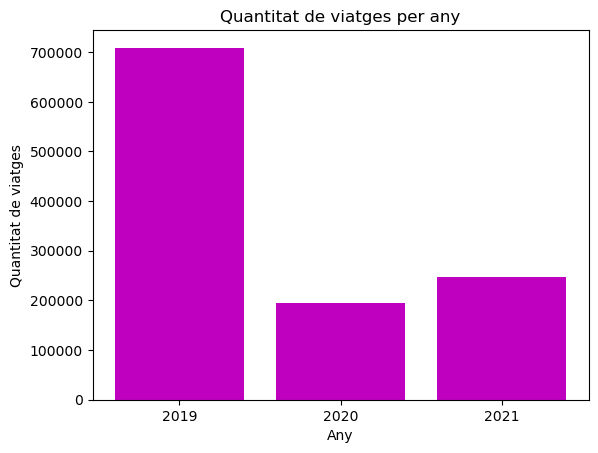

In [ ]:
def bar_plot(df, column, xlabel, ylabel, title):
    """
    Funció que crea una figura de barres a partir del dataframe i
    la columna que conté la informació
    """
    # AQUÍ EL TEU CODI
    
    plt.figure()  # creamos una figura donde poner la gráfica

    # AQUÍ EL TEU CODI
    x, y = df.groupby(column).size().index , df.groupby(column).size().values
    # index para sacar los valores de los años ( 2019 , 2020 , 2021 ) y values para saber la cantidad de viajes

    x = [str(year) for year in x]  # Convertir a cadenas para evitar más x de las que hay  ( 2019,5 no aporta nada ) 

    plt.title(title)        # poner título al gráfico
    plt.xlabel(xlabel)     # poner título al eje x
    plt.ylabel(ylabel)     # poner título al eje y
    plt.bar(x, y, color='m', label=ylabel)      # enseñar la gráfica con la x y la y de valores



bar_plot(df,
         'year',
         'Any',
         'Quantitat de viatges',
         'Quantitat de viatges per any')

+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

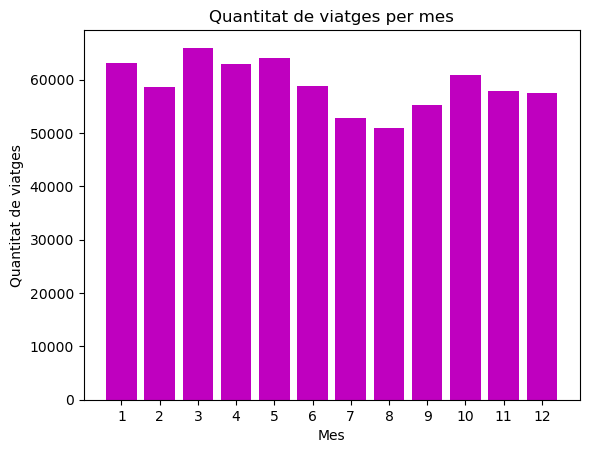

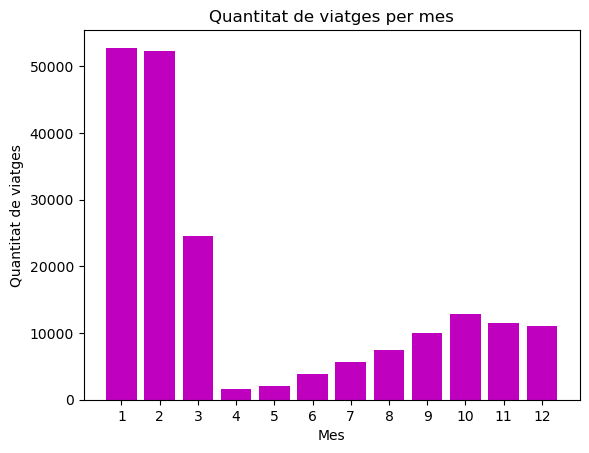

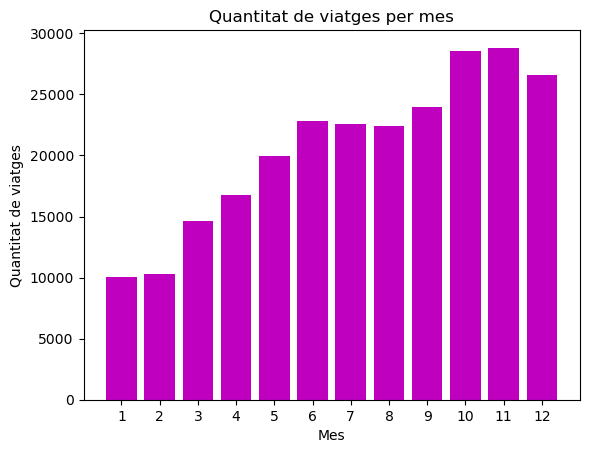

In [ ]:
# AQUÍ EL TEU CODI
bar_plot(df[df['year'] == 2019],
         'month',
         'Mes',
         'Quantitat de viatges',
         'Quantitat de viatges per mes')
bar_plot(df[df['year'] == 2020],
         'month',
         'Mes',
         'Quantitat de viatges',
         'Quantitat de viatges per mes')
bar_plot(df[df['year'] == 2021],
         'month',
         'Mes',
         'Quantitat de viatges',
         'Quantitat de viatges per mes')

+ Pregunta:
    + És el comportament que esperàveu? Explica la teva interpretació de les dades tenint en compte el que va passar al món durant aquests anys.

> Resposta :

Simplemente con el primer gráfico se puede ver como en 2019 el uso del taxi en Nueva York era muchisimo más elevado que en 2020 debido a la covid 19 y como en 2021 hubo una recuperación lenta a medida que las medidas de seguridad se relajaron, aunque no se quedaron ni cerca de igualar a los valores de 2019.

La situación era normal hasta principios de 2020, cuando la pandemia de COVID-19 comienza a generar efectos más severos. La Organización Mundial de la Salud declaró oficialmente la pandemia el 11 de marzo de 2020, y a partir de ese momento, el gráfico muestra una caída exagerada en la cantidad de viajes en taxi, especialmente en abril. Aunque el servicio de taxi no se detuvo por completo, su uso quedó restringido a casos esenciales. La gente prefería evitar el transporte compartido y optaba más por medios privados para minimizar el riesgo de contagio.

A lo largo de 2021, se observa una recuperación progresiva del número de viajes, a medida que las restricciones de movilidad se fueron relajando y las medidas de seguridad mejoraron, permitiendo a más personas utilizar servicios de transporte público y taxis nuevamente.

+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % enlloc dels nombres ababsoluts (utilitzeu el paràmetre *norm = True*).

 2019 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[504320 111544  31313  14988  29265  17577]
 2020 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[146032  28461   7495   3330   6347   4009]
 2021 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[184791  38507  10290   4055   6108   3818]


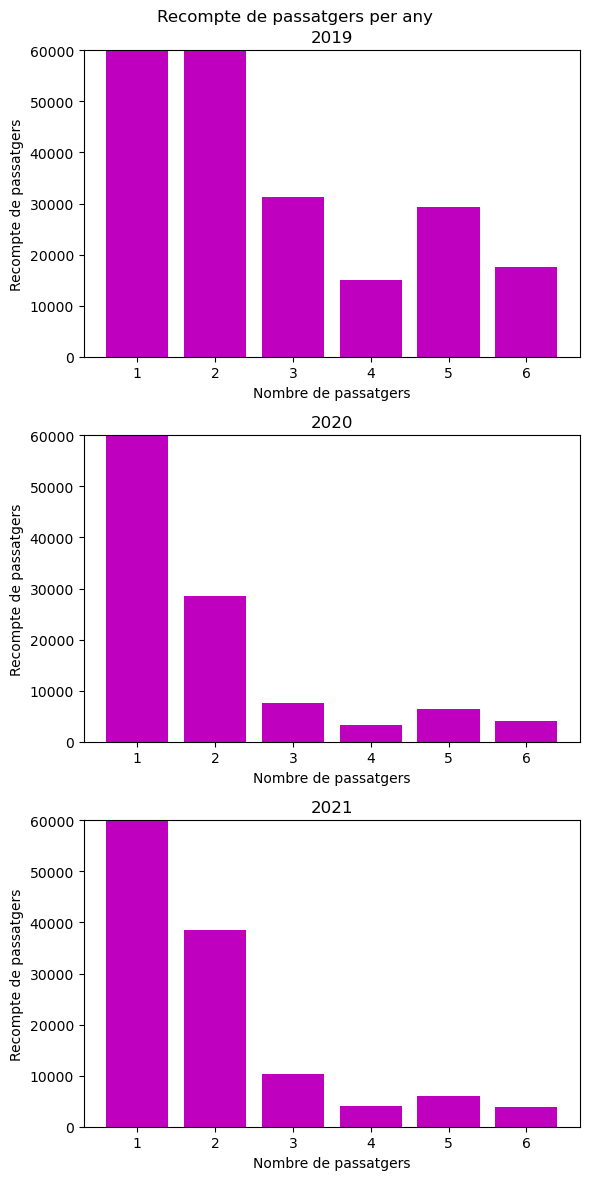

In [ ]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm = False):
    """
    Funció que visualitza quants passatgers hi ha per taxi i per any
    """
    # AQUÍ EL TEU CODI
    
    fig, axs = plt.subplots(3, 1, figsize = (6, 12)) # (filas , columnas, panel number)
    fig.suptitle(title)

    x1 = df[ df['year'] == 2019 ].groupby('passenger_count').size().index  # los posibles valores de pasajeros
    y1 = df[ df['year'] == 2019 ].groupby('passenger_count').size().values # la cantidad para cada valor

    x2 = df[ df['year'] == 2020 ].groupby('passenger_count').size().index
    y2 = df[ df['year'] == 2020 ].groupby('passenger_count').size().values

    x3 = df[ df['year'] == 2021 ].groupby('passenger_count').size().index     # los numeros de pasajeros que hubieron en 2021
    y3 = df[ df['year'] == 2021 ].groupby('passenger_count').size().values    # la cantidad de viajes con cada numero de pasajeros

    if norm :

        y1 = ( y1/ y1.sum() ) * 100   
        y2 = ( y2/ y2.sum() ) * 100 
        y3 = ( y3/ y3.sum() ) * 100    
        
        # dividimos los valores entre los viajes totales de ese año y lo multiplicamos *100 para tenerlo en tanto por ciento (normalizado)

    #para ver los valores exactos de cada columna
    
    print ( " 2019 : " )
    print(x1)
    print(y1)

    print ( " 2020 : " )
    print(x2)
    print(y2)

    print ( " 2021 : " )
    print(x3)
    print(y3)
    

    axs[0].set_title('2019')
    axs[0].set_ylim(ylim)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)    
    axs[0].bar(x1, y1, color='m', label=ylabel)

    axs[1].set_title('2020')
    axs[1].set_ylim(ylim)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)    
    axs[1].bar(x2, y2, color='m', label=ylabel)

    axs[2].set_title('2021')
    axs[2].set_ylim(ylim)
    axs[2].set_xlabel(xlabel)
    axs[2].set_ylabel(ylabel)    
    axs[2].bar(x3, y3, color='m', label=ylabel)

    plt.tight_layout()
    plt.show()


passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

 2019 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[71.13046839 15.73242577  4.41645851  2.11394246  4.12760382  2.47910105]
 2020 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[74.63025236 14.54511075  3.83035048  1.70181015  3.24366037  2.04881589]
 2021 : 
Index([1, 2, 3, 4, 5, 6], dtype='int64', name='passenger_count')
[74.64222096 15.55404756  4.156417    1.6379272   2.46719096  1.54219632]


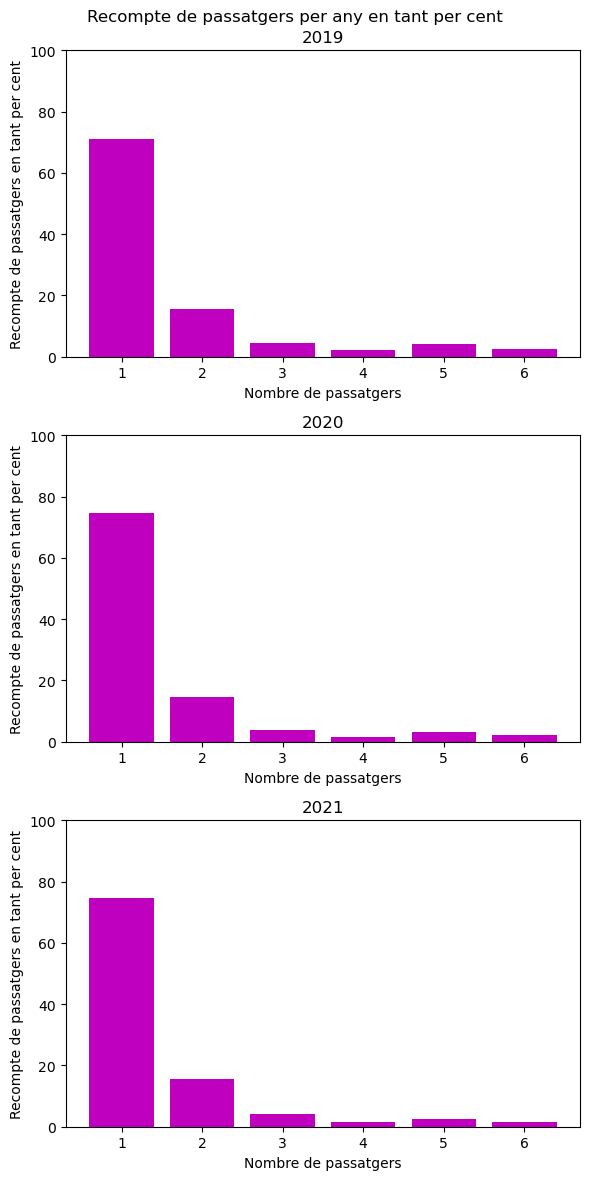

In [ ]:
# AQUÍ EL TEU CODI
passengers_taxi_year(df,
                     (0, 100),
                     'Nombre de passatgers',
                     'Recompte de passatgers en tant per cent',
                     'Recompte de passatgers per any en tant per cent',
                     norm=True
                    )

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?
+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, la mitja de passatgers per viatge, etc.).

> Respostes

> A pesar de tener una cantidad mucho menor de viajes en 2020 y 2021 respecto a 2019, se puede observar que la distribución
> de pasajeros en el taxi se ha mantenido semejante. Los viajes de 1 solo pasajero siguen predominando, aunque en 2020 y 2021 han
> augmentado ligeramente de 71% en 2019 a 75% en 2020 y 2021. Los valores de 2, 3, 4, 5 y 6 se han reducido ligeramente. Estos cambios són consecuencia de las medidas de seguridad y del
> distanciamiento social que provoco la covid, obligando a viajar solos o exclusivamente con grupos de gente de tu entorno, haciendo más comunes los viajes solos y más díficil los viajes en compañia. Entre los valores se puede ver como los viajes de 5 y 6 pasajeros són los más afectados reduciendo la cantidad en casi un 40% entre 2019 y 2021. Los viajes de 4 han bajado solo un 20% y para los viajes de 2 y 3 hubo una pequeña bajada en 2020 que acabo subiendo otra vez en 2021 a unos valores muy parecidos de 2019
> 

Media de pasajeros en 2019: 1.60
Media de pasajeros en 2020: 1.51
Media de pasajeros en 2021: 1.46

En 2020 hubo un 72.40% menos de viajes que en 2019.
En 2021 hubo un 65.08% menos de viajes que en 2019.
En 2021 hubo un 26.52% más de viajes que en 2020.

En 2020 hubo un 71.04% menos de viajes de una sola persona que en 2019.
En 2021 hubo un 63.36% menos de viajes de una sola persona que en 2019.
En 2021 hubo un 26.54% más de viajes de una sola persona que en 2020.

En 2020 hubo un 75.75% menos de viajes de 2 o más personas que en 2019.
En 2021 hubo un 69.33% menos de viajes de 2 o más personas que en 2019.
En 2021 hubo un 26.46% más de viajes de 2 o más personas que en 2020.


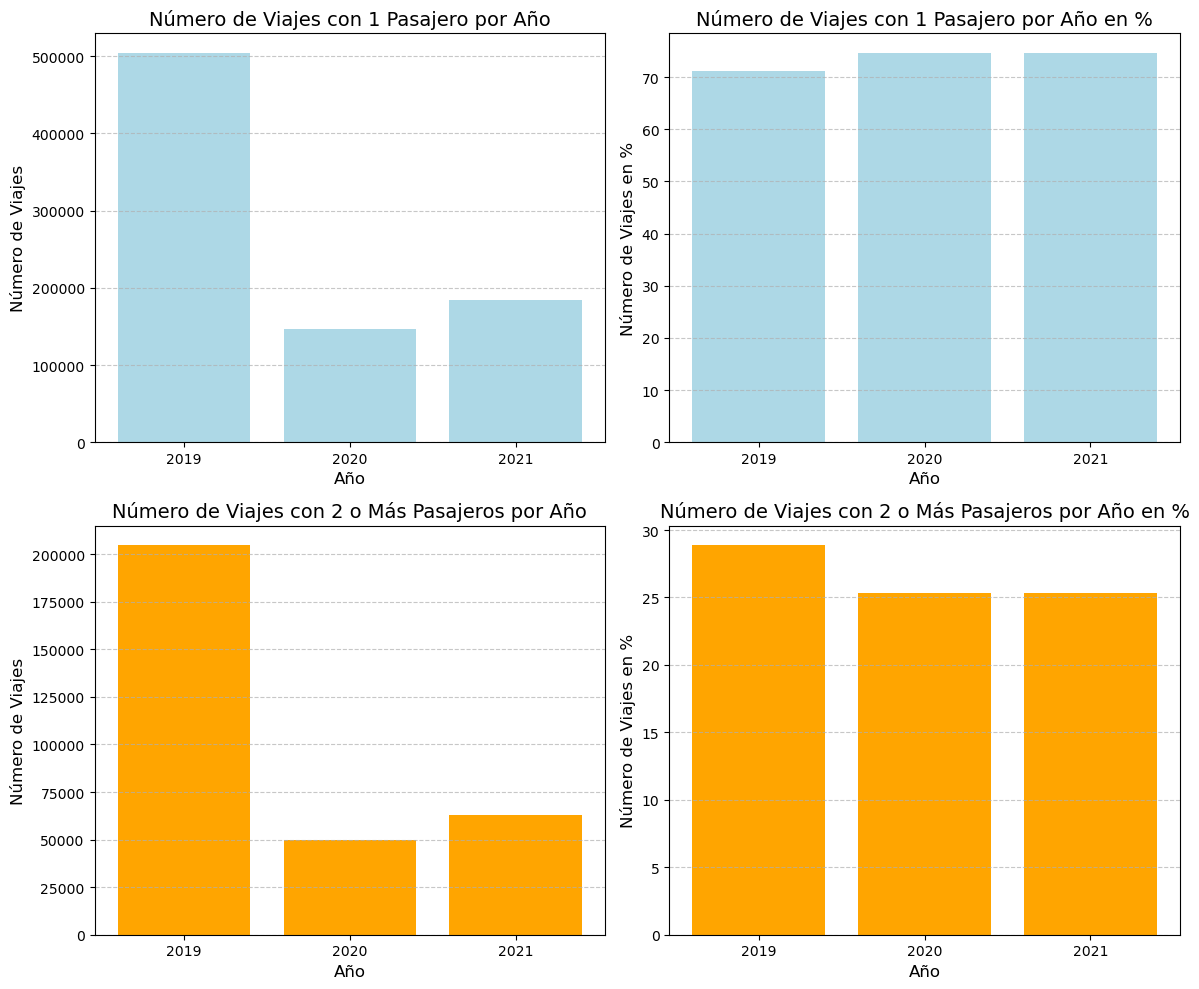

In [ ]:
# AQUÍ EL TEU CODI
def indicadors_quantitatius():
    """
    Valores quantitativos del número de pasajeros en los viajes de taxi

    """

    # media de pasajeros de cada año
    media2019 = df[df['year'] == 2019]['passenger_count'].mean()
    media2020 = df[df['year'] == 2020]['passenger_count'].mean()
    media2021 = df[df['year'] == 2021]['passenger_count'].mean()   # calculamos la media de pasajeros por año
    
    print(f"Media de pasajeros en 2019: {media2019:.2f}")
    print(f"Media de pasajeros en 2020: {media2020:.2f}")
    print(f"Media de pasajeros en 2021: {media2021:.2f}")

    #cantidad de viajes por cada año
    viajes2019 = df[df['year'] == 2019].groupby('passenger_count').size().values.sum()
    viajes2020 = df[df['year'] == 2020].groupby('passenger_count').size().values.sum()
    viajes2021 = df[df['year'] == 2021].groupby('passenger_count').size().values.sum()
        
    # Calcular el porcentaje de cambio
    cambio2020 = ((viajes2019 - viajes2020) / viajes2019) * 100
    cambio2021 = ((viajes2019 - viajes2021) / viajes2019) * 100
    cambio2021_2020 = ((viajes2021 - viajes2020) / viajes2020) * 100

    print()
    print(f"En 2020 hubo un {cambio2020:.2f}% menos de viajes que en 2019.")
    print(f"En 2021 hubo un {cambio2021:.2f}% menos de viajes que en 2019.")
    print(f"En 2021 hubo un {cambio2021_2020:.2f}% más de viajes que en 2020.")

    
    # Calcular viajes de 1 solo pasajero para ver el cambio porcentual
    viajes2019de1pasajero = df[(df['year'] == 2019) & (df['passenger_count'] == 1)].shape[0]
    viajes2020de1pasajero = df[(df['year'] == 2020) & (df['passenger_count'] == 1)].shape[0]
    viajes2021de1pasajero = df[(df['year'] == 2021) & (df['passenger_count'] == 1)].shape[0]
    
    
    cambio_porcentual_2019_2020 = ((viajes2020de1pasajero - viajes2019de1pasajero) / viajes2019de1pasajero) * 100
    cambio_porcentual_2020_2021 = ((viajes2021de1pasajero - viajes2020de1pasajero) / viajes2020de1pasajero) * 100
    cambio_porcentual_2019_2021 = ((viajes2021de1pasajero - viajes2019de1pasajero) / viajes2019de1pasajero) * 100
    
    print()
    print(f"En 2020 hubo un {-cambio_porcentual_2019_2020:.2f}% menos de viajes de una sola persona que en 2019.")
    print(f"En 2021 hubo un {-cambio_porcentual_2019_2021:.2f}% menos de viajes de una sola persona que en 2019.")
    print(f"En 2021 hubo un {cambio_porcentual_2020_2021:.2f}% más de viajes de una sola persona que en 2020.")
    
    # Calcular viajes de 2 o más pasajeros para ver el cambio porcentual
    viajes2019de2omaspasajero = df[(df['year'] == 2019) & (df['passenger_count'] != 1)].shape[0]
    viajes2020de2omaspasajero = df[(df['year'] == 2020) & (df['passenger_count'] != 1)].shape[0]
    viajes2021de2omaspasajero = df[(df['year'] == 2021) & (df['passenger_count'] != 1)].shape[0]
    
    cambio_porcentual_2019_2020 = ((viajes2020de2omaspasajero - viajes2019de2omaspasajero) / viajes2019de2omaspasajero) * 100
    cambio_porcentual_2020_2021 = ((viajes2021de2omaspasajero - viajes2020de2omaspasajero) / viajes2020de2omaspasajero) * 100
    cambio_porcentual_2019_2021 = ((viajes2021de2omaspasajero - viajes2019de2omaspasajero) / viajes2019de2omaspasajero) * 100
    
    print()
    print(f"En 2020 hubo un {-cambio_porcentual_2019_2020:.2f}% menos de viajes de 2 o más personas que en 2019.")
    print(f"En 2021 hubo un {-cambio_porcentual_2019_2021:.2f}% menos de viajes de 2 o más personas que en 2019.")
    print(f"En 2021 hubo un {cambio_porcentual_2020_2021:.2f}% más de viajes de 2 o más personas que en 2020.")

    # lo ponemos en listas para plotearlo y ver más claramente la diferencia.
    indices = [2019,2020,2021]
    valores2 = [viajes2019de2omaspasajero,viajes2020de2omaspasajero,viajes2021de2omaspasajero]
    valoresTantoPorCiento2 = [viajes2019de2omaspasajero/viajes2019  * 100 ,viajes2020de2omaspasajero/viajes2020  * 100,viajes2021de2omaspasajero/viajes2021 * 100]

    valores1 = [viajes2019de1pasajero, viajes2020de1pasajero, viajes2021de1pasajero]
    valoresTantoPorCiento1 = [viajes2019de1pasajero / viajes2019 * 100, viajes2020de1pasajero / viajes2020 * 100, viajes2021de1pasajero / viajes2021 * 100]

    
    # Crear la figura y los ejes
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Primer gráfico: Número de Viajes con 1 Pasajero
    axs[0, 0].bar(indices, valores1, color='lightblue')
    axs[0, 0].set_title('Número de Viajes con 1 Pasajero por Año', fontsize=14)
    axs[0, 0].set_xlabel('Año', fontsize=12)
    axs[0, 0].set_ylabel('Número de Viajes', fontsize=12)
    axs[0, 0].set_xticks(indices)
    axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Segundo gráfico: Gráfico en tanto por ciento para 1 Pasajero
    axs[0, 1].bar(indices, valoresTantoPorCiento1, color='lightblue')
    axs[0, 1].set_title('Número de Viajes con 1 Pasajero por Año en %', fontsize=14)
    axs[0, 1].set_xlabel('Año', fontsize=12)
    axs[0, 1].set_ylabel('Número de Viajes en %', fontsize=12)
    axs[0, 1].set_xticks(indices)
    axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tercer gráfico: Número de Viajes con 2 o Más Pasajeros
    axs[1, 0].bar(indices, valores2, color='orange')
    axs[1, 0].set_title('Número de Viajes con 2 o Más Pasajeros por Año', fontsize=14)
    axs[1, 0].set_xlabel('Año', fontsize=12)
    axs[1, 0].set_ylabel('Número de Viajes', fontsize=12)
    axs[1, 0].set_xticks(indices)
    axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Cuarto gráfico: Gráfico en tanto por ciento para 2 o Más Pasajeros
    axs[1, 1].bar(indices, valoresTantoPorCiento2, color='orange')
    axs[1, 1].set_title('Número de Viajes con 2 o Más Pasajeros por Año en %', fontsize=14)
    axs[1, 1].set_xlabel('Año', fontsize=12)
    axs[1, 1].set_ylabel('Número de Viajes en %', fontsize=12)
    axs[1, 1].set_xticks(indices)
    axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

    
indicadors_quantitatius()

>Respuesta

>La media de pasajeros indica que la mayoría de los viajes són de un solo pasajero, y que, con las medidas de seguridad implementadas en 2020 y 2021, se incrementaron aún más los viajes individuales. Según la gráfica de viajes, en 2020 (año de la pandemia) se observó un mayor porcentaje de viajes de un solo pasajero en comparación con 2019 y 2021, siendo 2019 un año normal y 2021 un año con las medidas de seguridad ya en vigor. En cuanto a los viajes de dos o más personas, se redujeron casi un 5% respecto a 2019, valor que se mantuvo en 2021, aún siendo año en el que las medidas de seguridad ya estaban implementadas y normalizadas en la sociedad.

>La cantidad total de viajes se desplomó en 2020, con una caída del 80%, lo que tuvo un impacto significativo en los taxistas. Afortunadamente, la situación mejoró en 2021, con un crecimiento cercano al 25%, a pesar de que la pandemia seguía activa.

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una única funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

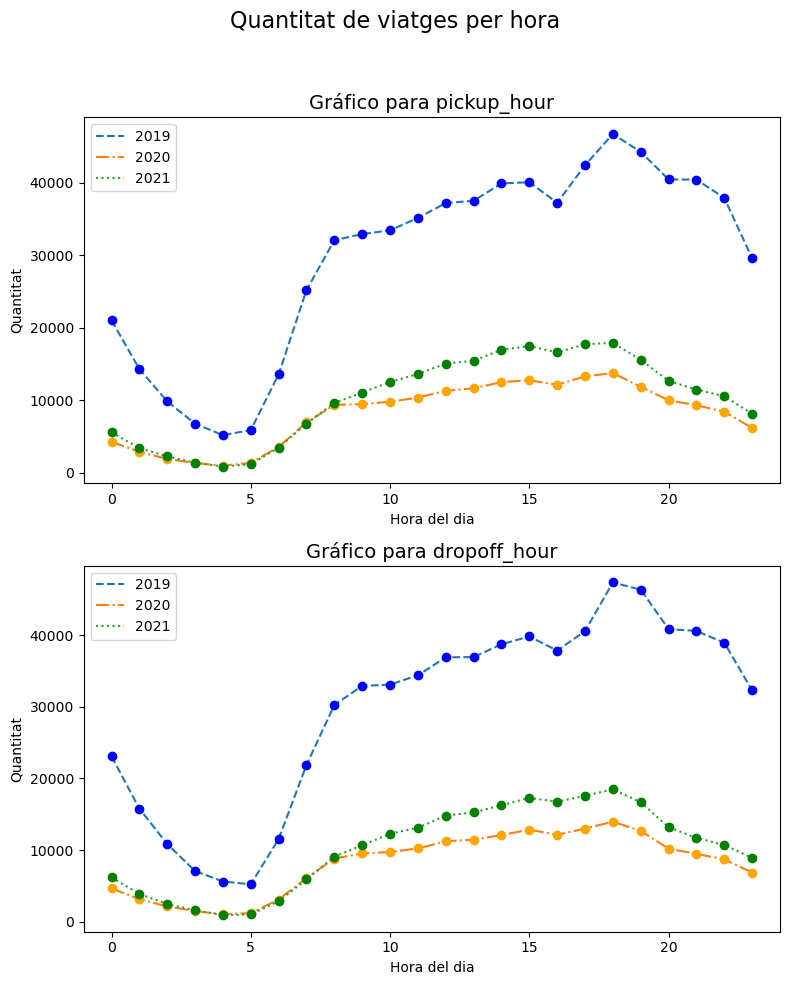

In [ ]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Función que visualiza los viajes para diferentes agregaciones de datos.

    NOTA:

    entiendo que por generico se pueden introducir cualquier numero de columnas ( no especifica 2 en ningun lado )
    """
    # Crear una figura grande para contener todos los subgráficos
    fig, axs = plt.subplots(len(columns), 1, figsize=(8, len(columns)*5)) # 1 columna de gráficos y tantas filas como columnas en el dataset
    fig.suptitle(title, fontsize=16)  # Título general para todos los gráficos

    for i in range(len(columns)):
        # Acceder al subgráfico correspondiente
        ax = axs[i]

        # Obtener los índices y valores para cada año
        indices2019 = df[df['year'] == 2019].groupby(columns[i]).size().index
        indices2020 = df[df['year'] == 2020].groupby(columns[i]).size().index
        indices2021 = df[df['year'] == 2021].groupby(columns[i]).size().index

        valores2019 = df[df['year'] == 2019].groupby(columns[i]).size().values
        valores2020 = df[df['year'] == 2020].groupby(columns[i]).size().values
        valores2021 = df[df['year'] == 2021].groupby(columns[i]).size().values

        indices = [indices2019, indices2020, indices2021]

        # Encontrar los límites mínimos y máximos para los valores del eje x
        x_min = min(idx.min() for idx in indices)
        x_max = max(idx.max() for idx in indices)

        # Configurar los límites del eje x
        ax.set_xlim(x_min - 1, x_max + 1)

        # Dibujar las líneas para cada año
        ax.plot(indices2019, valores2019, linestyle='dashed', label='2019')
        ax.plot(indices2020, valores2020, linestyle='dashdot', label='2020')
        ax.plot(indices2021, valores2021, linestyle='dotted', label='2021')

        # Marcar puntos individuales con scatter
        ax.scatter(indices2019, valores2019, color='blue', zorder=5)
        ax.scatter(indices2020, valores2020, color='orange', zorder=5)
        ax.scatter(indices2021, valores2021, color='green', zorder=5)

        # Configurar título y etiquetas
        ax.set_title(f'Gráfico para {columns[i]}', fontsize=14)  # Subtítulo para cada gráfico
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar layout para no superponer el título global con los gráficos
    plt.show()



visualize_trips(df,
                ['pickup_hour', 'dropoff_hour',],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

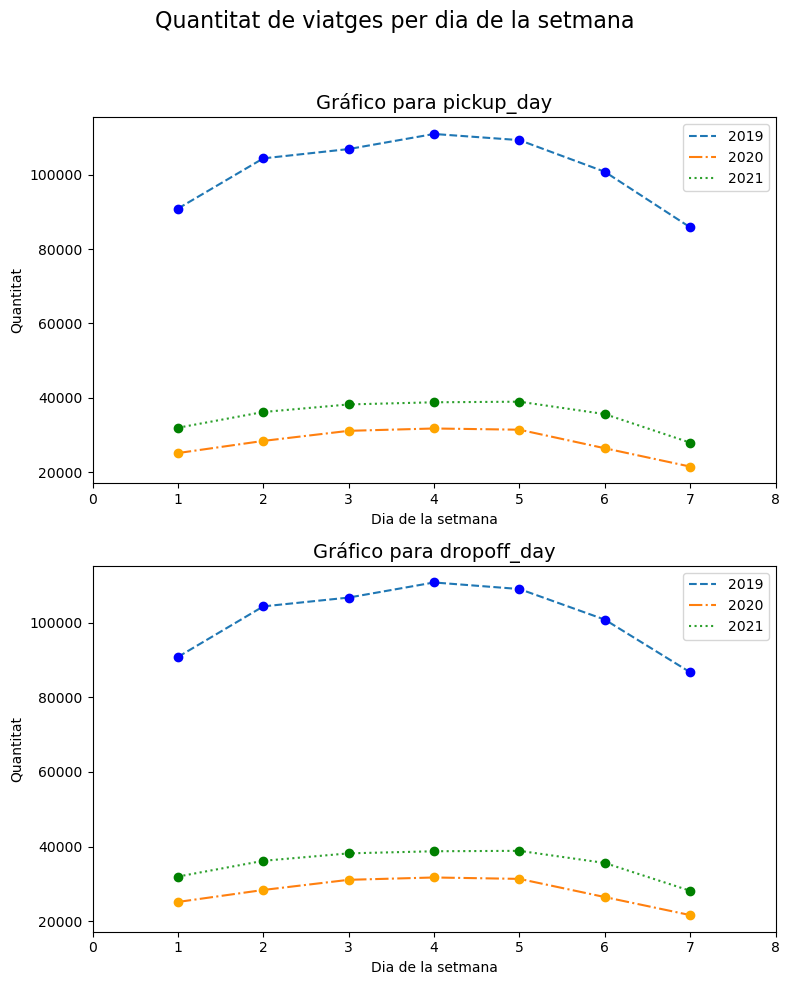

In [ ]:
visualize_trips(df,
                ['pickup_day', 'dropoff_day'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

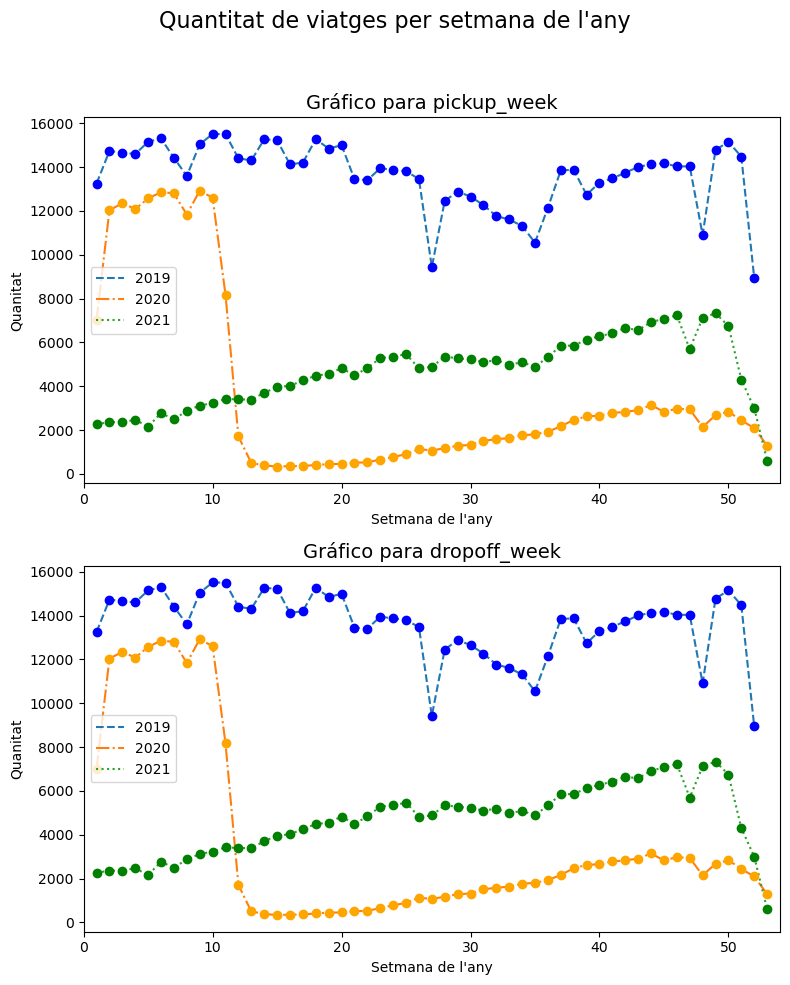

In [ ]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta:

> En el primer gráfico muestra cómo la actividad diaria en los viajes de taxi en Nueva York sigue un patrón lógico en función de los horarios laborales, con picos en las horas de entrada y salida del trabajo. La pandemia en 2020 afectó drásticamente la cantidad de viajes en todas las horas del día, y aunque 2021 muestra signos de recuperación, todavía está lejos de alcanzar los niveles de 2019.

> En el gráfico de que día de la semana se cogen los taxis, se ve con claridad la reducción de viajes en los años 2020 y 2021, pero la distribución sigue siendo casi la misma, donde los días con más uso del taxi són miercoles jueves y viernes. Esto se debe a que són los días con más ocio durante la semana. Los fines de semana baja la actividad porque serian los días de descanso y lunes y martes serían los días más rutinarios.

> En el último gráfico , el efecto de la covid en el año que sucedió (2020) es de una bajada repentina en la semana que se anuncio como pandemia mundial. A partir de alli la gráfica solo sube lentamente , que seria la sociedad recuperandose y implantando medidas de seguridad para poder volver a la normalidad.  También se aprécian algunos mínimos en semanas importantes como semana santa, acción de gracia y navidad, donde la gente no suele usar el transporte
>


## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

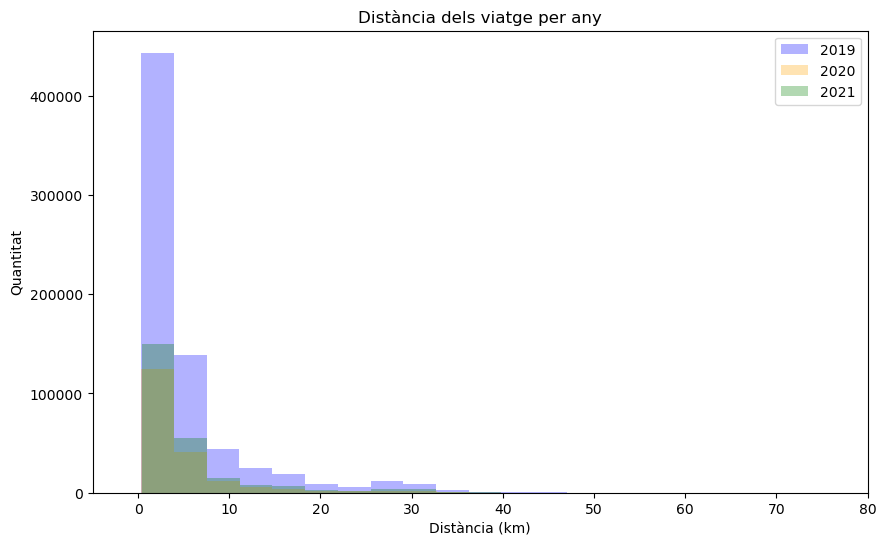

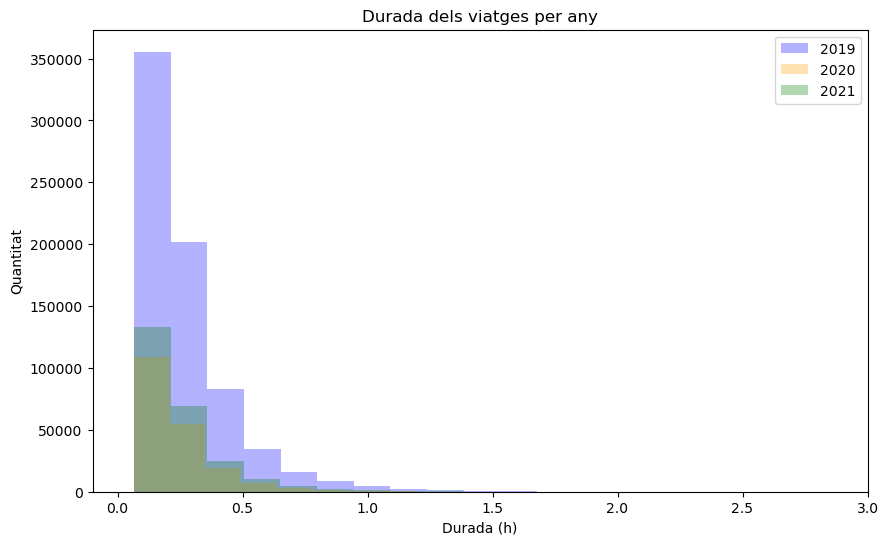

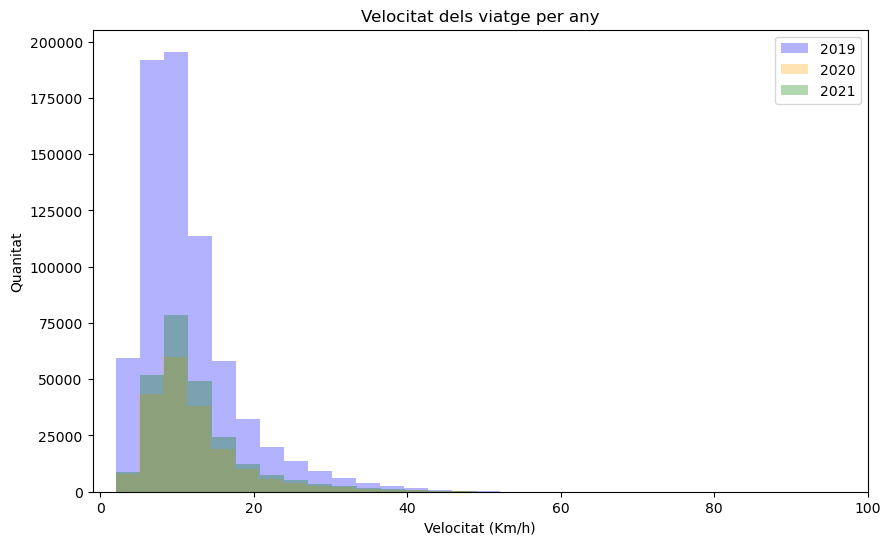

In [ ]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Funció que crea un histograma a partir de la informació que conté la columna del dataframe
    """
    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
    plt.title(title)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Filtrar los datos para cada año
    data_2019 = df[df['year'] == 2019][column]
    data_2020 = df[df['year'] == 2020][column]
    data_2021 = df[df['year'] == 2021][column]
    
    # Definir los argumentos comunes para los histogramas
    kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
    # histtype -- > tipo de histograma
    # alpha -- > nivel de transparencia
    # bins -- > numero de intervalos agrupados
    
    # Graficar los histogramas superpuestos
    plt.hist(data_2019, **kwargs, label='2019', color='blue')
    plt.hist(data_2020, **kwargs, label='2020', color='orange')
    plt.hist(data_2021, **kwargs, label='2021', color='green')
    
    plt.legend()
    plt.show()


visualize_histograms(df, 'trip_distance_Km', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 80))

visualize_histograms(df, 'trip_duration_h', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-0.1, 3) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (-1, 100) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

* I a la velocitat dels taxis?

> Resposta:
* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> En los gráficos de duración y distancia tienen una distribución bastante similar, siendo casi qualitativamente iguales. Esto se debe a que la población usaba en menor medida los taxis por culpa de la covid, pero estos viajes eran bastante similares a los anteriores.
> 
* I a la velocitat dels taxis?
  
>Las velocidades de los taxis aumentaron cuando había menos coches en la carretera debido a la pandemia y sobretodo habiendo muchos menos atascos. Se puede ver ya que los picos máximos de 2020 y 2021 son más elevados que los picos de 2019

+ Pregunta:

https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

+ Utilitzant el DataFrame, escriu una funció que identifiqui les cinc ubicacions de recollida (PULocationID) més freqüents.
+ Per a aquestes cinc ubicacions de recollida, calcula el nombre mitjà de passatgers (passenger_count) per trajecte.
+ Filtra els trajectes on la ubicació de recollida i de deixada són la mateixa (PULocationID == DOLocationID). Calcula el percentatge d'aquests trajectes respecte al total de trajectes.

In [ ]:
def analyze_pickup_dropoff_locations(df):
    """
    5 Ubicaciones de recogida mas frecuentes 
    media de pasajeros
    porcentaje donde puLocation = DoLocation
    """

    # AQUÍ EL TEU CODI
    
    dfPULocationSorted = df['PULocationID'].value_counts()
    print(f'Top 5 ubicacions de recollida: {dfPULocationSorted.index[0:5]}')
    
    dfMeanPassenger = df.groupby('PULocationID')['passenger_count'].mean()
    print(f"Mitjana de passatgers per: {dfMeanPassenger.loc[dfPULocationSorted.index[0:5]]}")

    same_location_trips = df[df['PULocationID'] == df['DOLocationID']]
    
    # Calcula el percentatge respecte al total de trajectes
    total_trips = len(df)
    same_location_count = len(same_location_trips)
    percent = (same_location_count / total_trips) * 100
    
    print(f"Percentatge de trajectes amb la mateixa ubicació de recollida i deixada: {percent:.2f}%")
    
analyze_pickup_dropoff_locations(df)

Top 5 ubicacions de recollida: Index([237, 161, 236, 186, 162], dtype='int64', name='PULocationID')
Mitjana de passatgers per: PULocationID
237    1.511103
161    1.549032
236    1.522332
186    1.520867
162    1.540832
Name: passenger_count, dtype: float64
Percentatge de trajectes amb la mateixa ubicació de recollida i deixada: 2.47%
